# Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv("AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1 = df.reset_index()["close"]

In [5]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

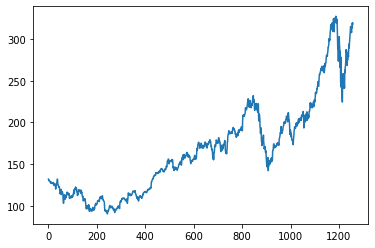

In [6]:
import matplotlib.pyplot as plt 
plt.plot(df1)


### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [11]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [12]:
df1.shape

(1258, 1)

for time series dataset or forcasting case we will split the train and test dataset in different way.

In [14]:
# Split the dataset into train and test set
training_size = int(len(df1)*0.65) # 65% of my total length of training data should be training size
test_size = len(df1) - training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [15]:
training_size , test_size

(817, 441)

In [16]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [17]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset , time_step=1):
    dataX , dataY = [] , []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step , 0])
    
    return np.array(dataX) , np.array(dataY)

In [18]:
# reshape into X=t ,t+1 ,t+2 ,t+3 and Y=t+4

time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [19]:
X_train.shape , y_train.shape

((716, 100), (716,))

In [20]:
X_test.shape , y_test.shape

((340, 100), (340,))

In [21]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [23]:
# Create the stacked  LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  ,LSTM

model = Sequential([
    LSTM(50 , return_sequences=True , input_shape=(100,1)),
    LSTM(50 , return_sequences=True),
    LSTM(50),
    Dense(1)
])

In [24]:
model.compile(loss="mean_squared_error" , optimizer = "adam")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=100 , batch_size = 64 , verbose = 1)

Epoch 1/100
12/12 [==============================] - 8s 686ms/step - loss: 0.0182 - val_loss: 0.0590
Epoch 2/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 4/100
12/12 [==============================] - 4s 306ms/step - loss: 8.7381e-04 - val_loss: 0.0047
Epoch 5/100
12/12 [==============================] - 4s 338ms/step - loss: 6.4913e-04 - val_loss: 0.0060
Epoch 6/100
12/12 [==============================] - 4s 331ms/step - loss: 5.9783e-04 - val_loss: 0.0048
Epoch 7/100
12/12 [==============================] - 4s 358ms/step - loss: 6.1314e-04 - val_loss: 0.0048
Epoch 8/100
12/12 [==============================] - 3s 291ms/step - loss: 5.8133e-04 - val_loss: 0.0057
Epoch 9/100
12/12 [==============================] - 3s 289ms/step - loss: 6.0347e-04 - val_loss: 0.0054
Epoch 10/100
12/12 [==============================] - 4s 304ms/step

In [33]:
# Lets Do the prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


In [34]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [35]:
# Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

141.67121342689484

In [36]:
math.sqrt(mean_squared_error(y_test , test_predict))

234.54038330525114

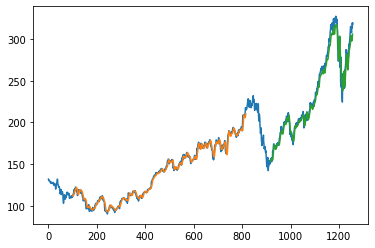

In [37]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [44]:
len(temp_input)

100

In [45]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.92767501 0.91652936 0.89743209
 0.87657851 0.85688508 0.83991432 0.82658881 0.81734723 0.81219274
 0.81075382 0.81236631 0.81616372 0.82116723]
13 day output [[0.82637835]]
14 day input [0.95989192 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536
 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97

In [47]:
day_new = np.arange(1 , 101)
day_pred = np.arange(101 , 131)

In [48]:
len(df1)

1258

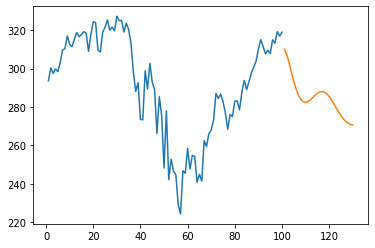

In [49]:
plt.plot(day_new , scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

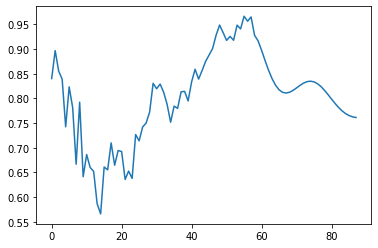

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])